LOAD DATA

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

df = pd.read_csv('https://raw.githubusercontent.com/btlgs2000/machine_learning_basic/master/data/houses_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/btlgs2000/machine_learning_basic/master/data/houses_test_no_price.csv' )

EDA

In [89]:
df.shape

(3680, 19)

In [90]:
df_test.shape

(920, 18)

In [91]:
df.head()  #visualizzazione prime 5 righe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2315,2014-06-11 00:00:00,700000.0,3.0,2.75,2500,7378,1.0,0,0,5,1390,1110,1948,1985,10050 11th Ave NW,Seattle,WA 98177,USA
1,1434,2014-05-28 00:00:00,225000.0,3.0,2.00,2030,24829,1.0,0,0,4,1220,810,1979,0,36721 34th Ave S,Auburn,WA 98001,USA
2,1412,2014-05-27 00:00:00,754950.0,3.0,2.50,2610,7256,2.0,0,0,3,2610,0,2014,0,12108 NE 106th Pl,Kirkland,WA 98033,USA
3,3837,2014-07-02 00:00:00,411000.0,4.0,2.00,2370,76665,2.0,0,0,4,2370,0,1978,2000,35516 44th Ave S,Auburn,WA 98001,USA
4,4267,2014-07-09 00:00:00,215000.0,3.0,1.00,1200,7280,1.0,0,0,4,1200,0,1967,0,4503 S 256th St,Kent,WA 98032,USA


In [92]:
df.tail() #visualizzazione ultime 5 righe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3675,3648,2014-06-30 00:00:00,535000.0,3.0,1.00,1580,6300,1.0,0,0,3,1180,400,1925,2002,2108 W Bertona St,Seattle,WA 98199,USA
3676,1834,2014-06-04 00:00:00,375000.0,4.0,1.75,2200,7475,1.0,0,0,5,1100,1100,1955,0,6609 43rd Ave S,Seattle,WA 98118,USA
3677,1829,2014-06-03 00:00:00,427874.0,3.0,3.00,2340,5002,2.0,0,0,3,2340,0,2013,1923,897 SE 11th St,North Bend,WA 98045,USA
3678,3523,2014-06-27 00:00:00,665000.0,2.0,1.00,1110,3200,1.0,0,0,3,1110,0,1925,2002,1604 1st Ave W,Seattle,WA 98119,USA
3679,2810,2014-06-18 00:00:00,309000.0,3.0,2.25,1490,1294,2.0,0,0,3,1220,270,2010,0,5011-5021 Delridge Way SW,Seattle,WA 98106,USA


In [93]:
df.dtypes  #tipo di variabili

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [94]:
df_drop = df.drop(['id','date','country','street'], axis=1) #elimino variabili poco rilevanti

In [95]:
df_drop_test = df_test.drop(['id','date','country','street'], axis=1) #elimino variabili poco rilevanti anche dal test

In [96]:
df_drop.shape

(3680, 15)

In [97]:
df_drop_test.shape

(920, 14)

In [98]:
print(df_drop.isnull().sum()) #controllo se ci sono valori nulli

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
statezip         0
dtype: int64


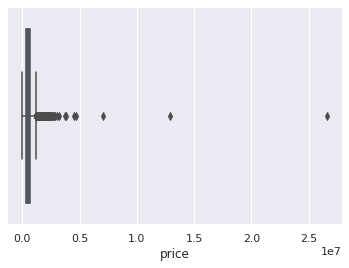

In [99]:
sns.boxplot(x=df_drop['price']) #verifico se ci sono degli outliers

In [100]:
df_drop.describe() #verifico come è statistica dei dati

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,3.680000e+03,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,5.574161e+05,3.392935,2.158764,2136.351359,14630.927174,1.508016,0.007065,0.241576,3.450000,1821.329891,315.021467,1970.725272,813.998370
std,6.086800e+05,0.909587,0.788535,975.463212,32124.162388,0.539803,0.083769,0.781729,0.677924,872.850900,467.324807,29.663205,980.434151
min,0.000000e+00,0.000000,0.000000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.250000e+05,3.000000,1.750000,1460.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1970.000000,7651.000000,1.500000,0.000000,0.000000,3.000000,1580.000000,0.000000,1976.000000,0.000000
75%,6.590000e+05,4.000000,2.500000,2610.000000,11085.750000,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1996.250000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,641203.000000,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


dalla descrizione statistica delle varibili e dal boxplot del prezzo vedo due cose: 


1.   ci sono dei prezzi di case di valore 0  -> da eliminare
2.   ci sono outliers di prezzo che si discostano di tanto -> da eliminare



In [101]:
df_drop['price'].value_counts() #verifico quanti '0' ci sono in price

0.000000         41
300000.000000    35
400000.000000    28
450000.000000    26
600000.000000    25
                 ..
152000.000000     1
197000.000000     1
459990.000000     1
287919.782609     1
394000.000000     1
Name: price, Length: 1526, dtype: int64

In [102]:
df_drop['price'].sort_values()

2839           0.0
197            0.0
1968           0.0
615            0.0
2869           0.0
           ...    
48       4489000.0
2027     4668000.0
2160     7062500.0
1475    12899000.0
165     26590000.0
Name: price, Length: 3680, dtype: float64

In [103]:
df_drop = df_drop[df_drop['price'] != 0] #elimino gli zeri da price

In [104]:
df_drop.shape #verifico che li abbia eliminati

(3639, 15)

In [105]:
df_drop.describe() #verifico come si è modificata la statistica del dataframe dopo aver eliminato gli zeri

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,3.639000e+03,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000
mean,5.636965e+05,3.385271,2.152102,2128.426216,14596.746084,1.507557,0.006595,0.235229,3.447101,1815.332234,313.093982,1970.738939,814.424292
std,6.092008e+05,0.904732,0.780762,967.495691,32147.597627,0.540051,0.080954,0.767797,0.675001,863.937053,465.520473,29.683894,980.538492
min,7.800000e+03,0.000000,0.000000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.284615e+05,3.000000,1.750000,1460.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1951.000000,0.000000
50%,4.630000e+05,3.000000,2.250000,1960.000000,7644.000000,1.500000,0.000000,0.000000,3.000000,1580.000000,0.000000,1976.000000,0.000000
75%,6.600000e+05,4.000000,2.500000,2600.000000,11039.000000,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1996.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,641203.000000,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [106]:
df_drop = df_drop[df_drop['price'] < 5000000] #elimino gli outliars

In [107]:
df_drop.shape

(3636, 15)

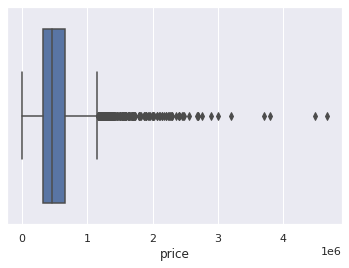

In [108]:
sns.boxplot(x=df_drop['price']) #ri-plotto il boxplot senza gli zeri e gli outliars

cerco le correlazioni tra il target (price) e le altre variabili numeriche

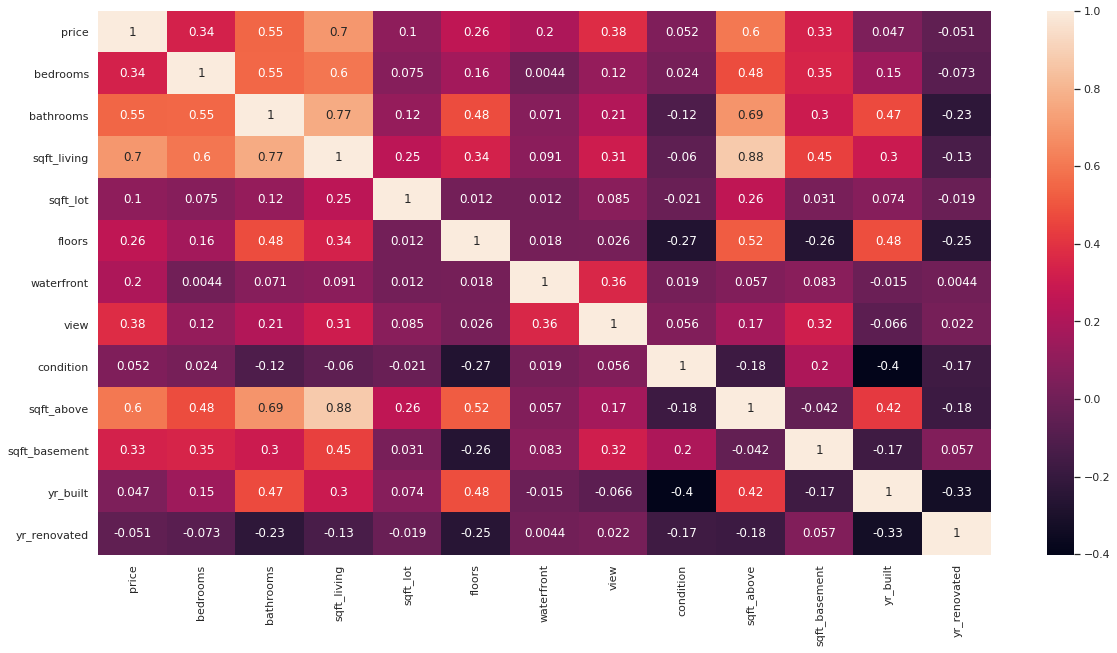

In [109]:
plt.figure(figsize=(20,10))
c=df_drop.corr()
sns.heatmap(c, annot=True)

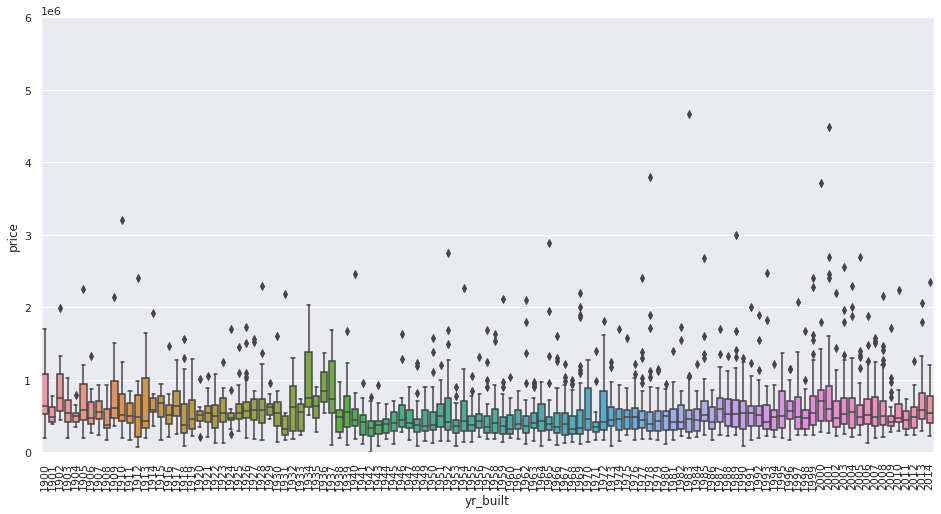

In [110]:
#verifico se c'è un trend in salita con l'anno di costruzione rispetto al prezzo
var = 'yr_built'
data = pd.concat([df_drop['price'], df_drop[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=6000000);
plt.xticks(rotation=90);


dai boxplot non si vede un trend particolarmente marcato all'aumentare dell'anno di costruzione

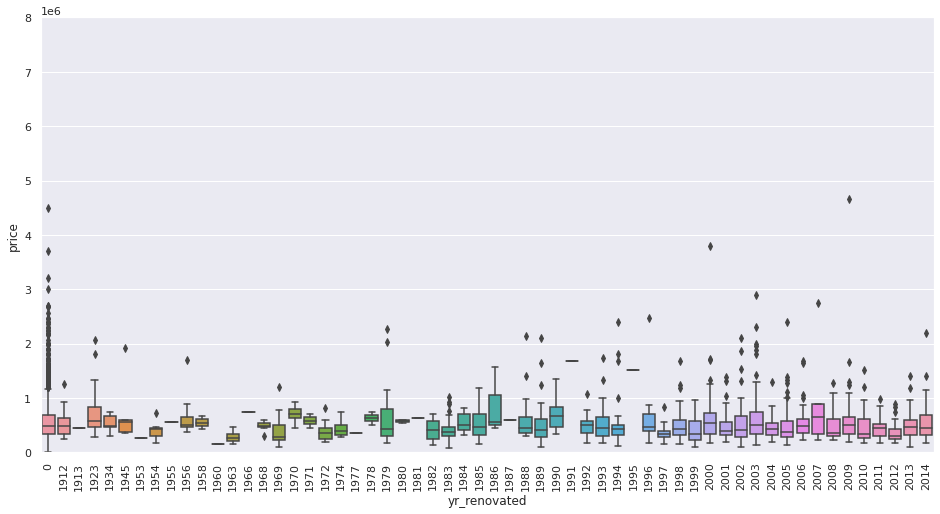

In [111]:
#verifico se c'è un trend in salita con l'anno di restrutturazione rispetto al prezzo
var = 'yr_renovated'
data = pd.concat([df_drop['price'], df_drop[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);
plt.xticks(rotation=90);

nessun trend neanche con l'anno di restrutturazione

considero le due variabili più correlate con il target e le plotto per vedere se c'è un andamento lineare

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


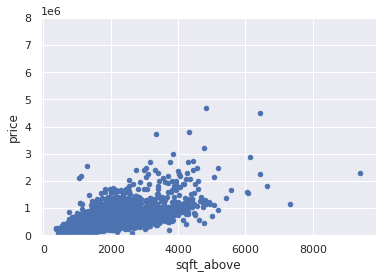

In [112]:
#scatter plot sqft_living/price
var = 'sqft_above'
data = pd.concat([df_drop['price'], df_drop[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,8000000));


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


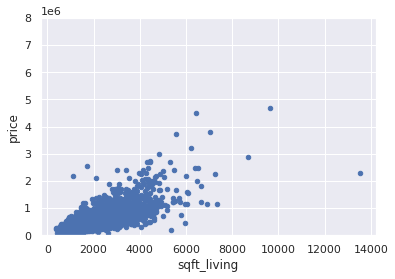

In [113]:
#scatter plot sqft_living/price
var = 'sqft_living'
data = pd.concat([df_drop['price'], df_drop[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,8000000));

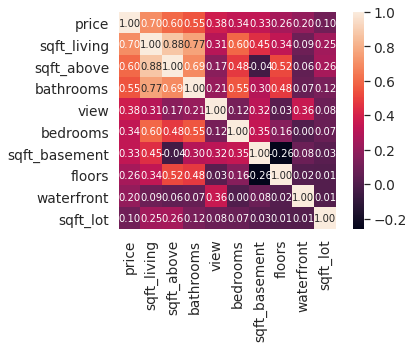

In [253]:
#price correlation matrix
# k = 10 #number of variables for heatmap
# cols = c.nlargest(k, 'price')['price'].index
# cm = np.corrcoef(df_drop[cols].values.T)
#sns.set(font_scale=1.25)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#plt.show()

In [114]:
print("Find most important features relative to target")
corr = df_drop.corr()
corr.sort_values(['price'], ascending=False, inplace=True)
corr.price

Find most important features relative to target


price            1.000000
sqft_living      0.700112
sqft_above       0.600996
bathrooms        0.547769
view             0.381457
bedrooms         0.337400
sqft_basement    0.334176
floors           0.256184
waterfront       0.200873
sqft_lot         0.100664
condition        0.051861
yr_built         0.046665
yr_renovated    -0.051196
Name: price, dtype: float64

vedo che le variabili più correlate sono effettivamente sqft_above e sqft_living


Provo a plottare anche altre variabili e vedere se si trovano relazioni interessanti

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


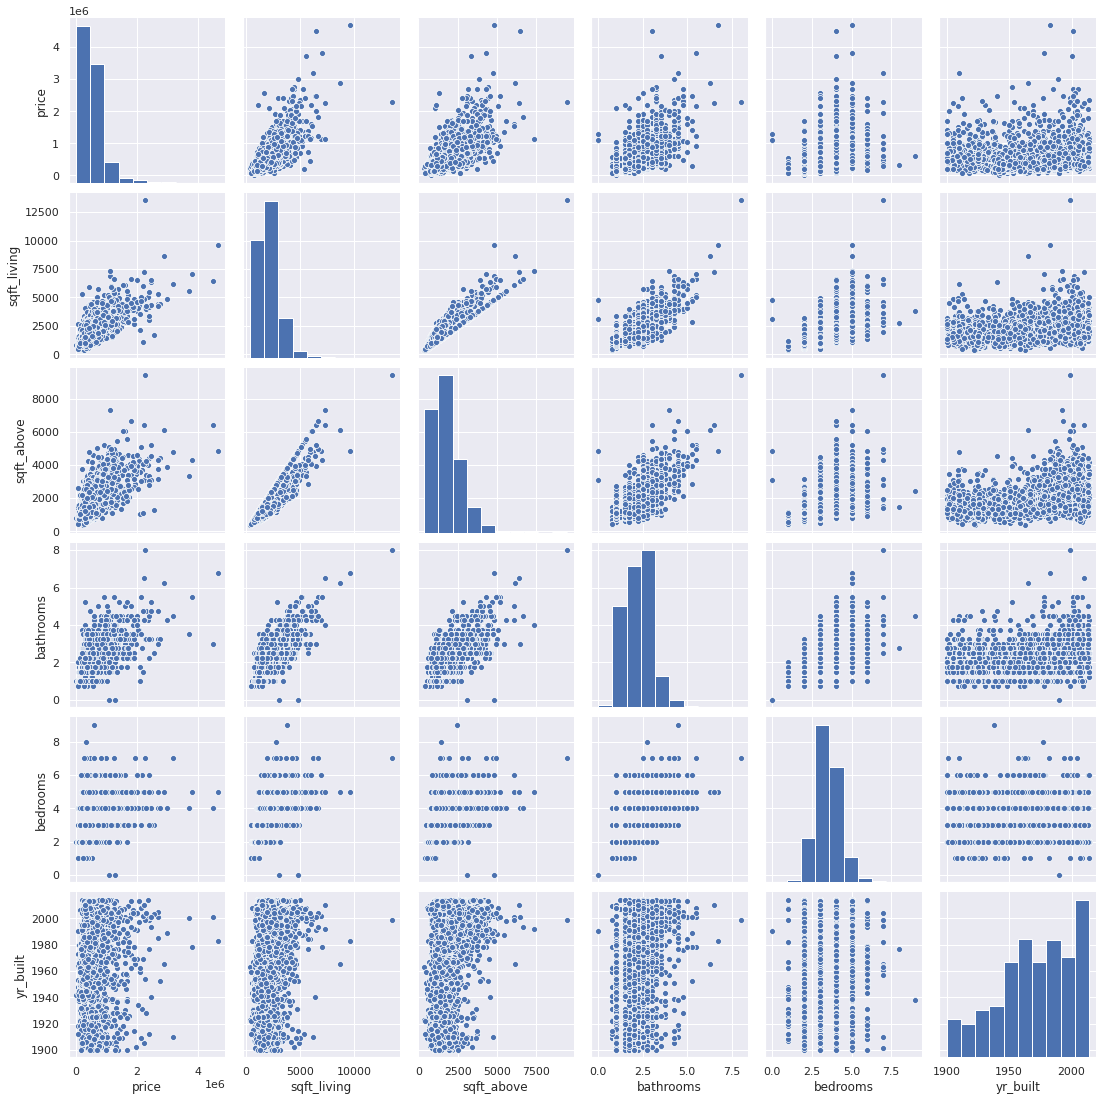

In [115]:
sns.set()
cols = ['price', 'sqft_living', 'sqft_above', 'bathrooms', 'bedrooms', 'yr_built']
sns.pairplot(df_drop[cols], size = 2.5)
plt.show();


DATA WRANGLING 


Guardo come è la distribuzione del target e delle varibili maggiormente correlate

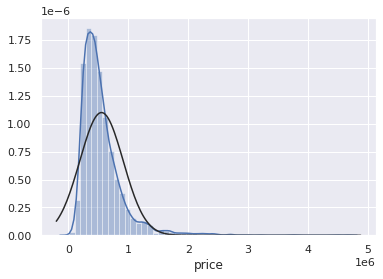

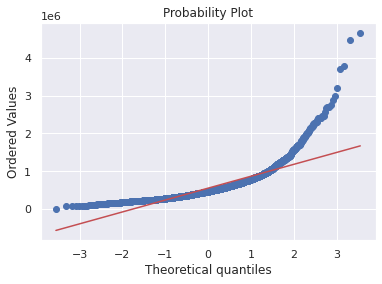

In [116]:
#histogram and normal probability plot del prezzo
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

ax = sns.distplot(df_drop['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop['price'], plot=plt)

la distribuzione del prezzo non è lineare, quindi applico una trasformazione logaritimica al target e vado a vedere come si modifica

In [117]:
#applying log transformation del target
df_drop['price'] = np.log(df_drop['price'])

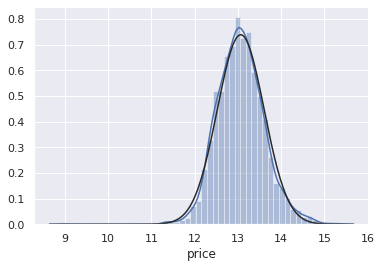

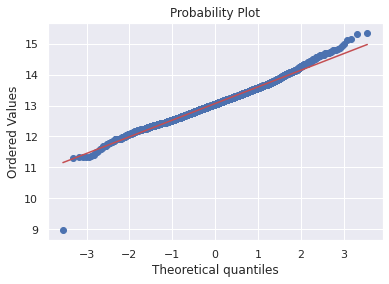

In [118]:
#transformed histogram and normal probability plot del target
sns.distplot(df_drop['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop['price'], plot=plt)

In [119]:
print(df_drop.price)

0       13.458836
1       12.323856
2       13.534407
3       12.926348
4       12.278393
          ...    
3675    13.190022
3676    12.834681
3677    12.966584
3678    13.407542
3679    12.641097
Name: price, Length: 3636, dtype: float64


verifico la stessa cosa anche per le altre due variabili maggiormente correlate

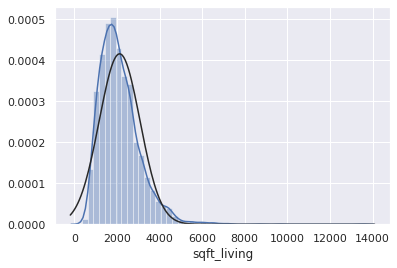

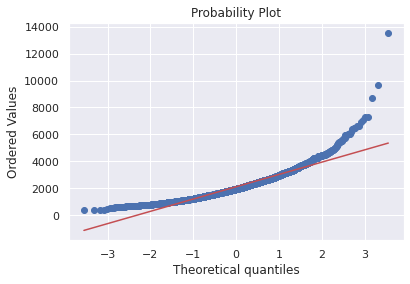

In [120]:
#histogram and normal probability plot prima variabile
sns.distplot(df_drop['sqft_living'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop['sqft_living'], plot=plt)

In [121]:
#data transformation prima variabile
df_drop['sqft_living'] = np.log(df_drop['sqft_living'])

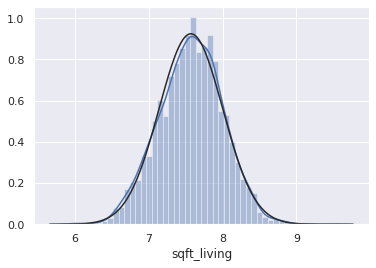

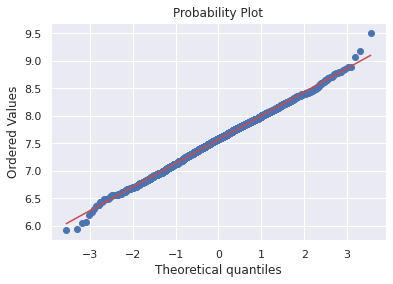

In [122]:
#transformed histogram and normal probability plot prima variabile
sns.distplot(df_drop['sqft_living'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop['sqft_living'], plot=plt)

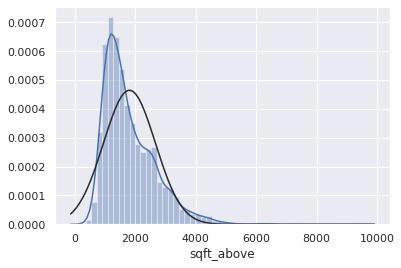

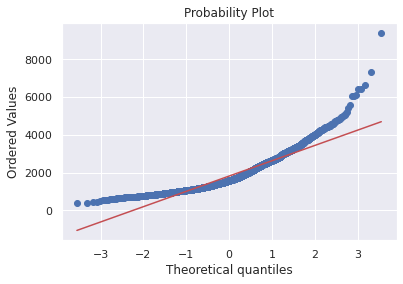

In [123]:
#histogram and normal probability plot seconda variabile
sns.distplot(df_drop['sqft_above'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop['sqft_above'], plot=plt)

In [124]:
#data transformation seconda variabile
df_drop['sqft_above'] = np.log(df_drop['sqft_above'])

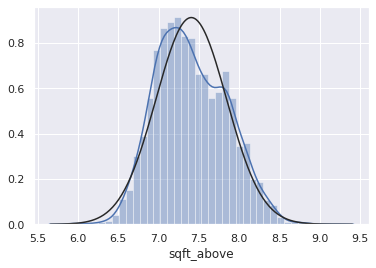

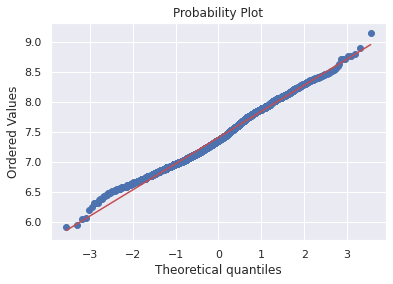

In [125]:
#transformed histogram and normal probability plot seconda variabile
sns.distplot(df_drop['sqft_above'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop['sqft_above'], plot=plt)

CREAZIONE NUOVA VARIABILE: considero la varibile sqft_above e vado a indicizzarla con 0 se ha area nulla e con 1 se ha area > 0

In [126]:
#create column for new variable 
#if area>0 it gets 1, for area==0 it gets 0
df_drop['hasabove'] = pd.Series(len(df_drop['sqft_above']), index=df_drop.index)
df_drop['hasabove'] = 0 
df_drop.loc[df_drop['sqft_above']>0,'hasabove'] = 1

anche per questa variabile faccio la stessa trasformazione che ho applicato al target e alle altre due variabili

In [127]:
#transform data
df_drop.loc[df_drop['hasabove']==1,'sqft_above'] = np.log(df_drop['sqft_above'])

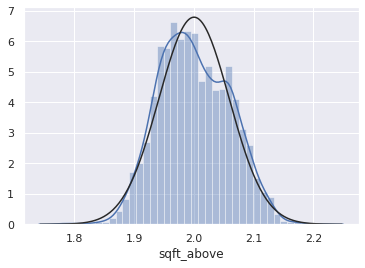

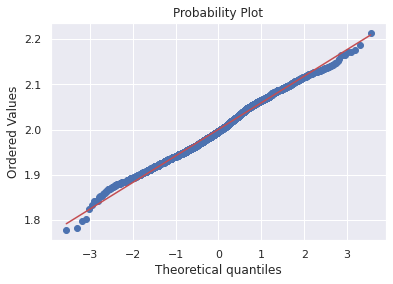

In [128]:
#histogram and normal probability plot
sns.distplot(df_drop[df_drop['sqft_above']>0]['sqft_above'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop[df_drop['sqft_above']>0]['sqft_above'], plot=plt)

dopo aver applicato le trasformazioni vado a verificare come si sono modificati gli scatterplot delle veriabili rispetto al target

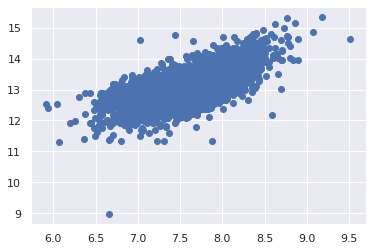

In [129]:
#scatter plot
plt.scatter(df_drop['sqft_living'], df_drop['price']);


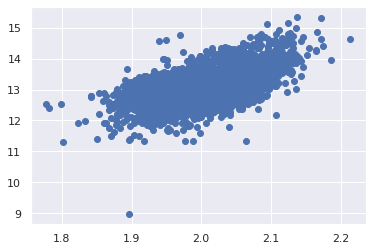

In [130]:
#scatter plot
plt.scatter(df_drop[df_drop['sqft_above']>0]['sqft_above'], df_drop[df_drop['sqft_above']>0]['price']);

faccio la stessa cosa anche per il test

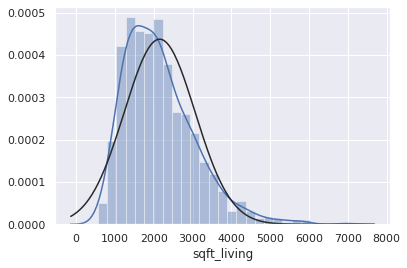

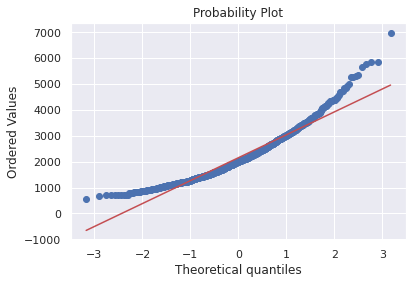

In [131]:
#histogram and normal probability plot
sns.distplot(df_drop_test['sqft_living'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop_test['sqft_living'], plot=plt)

In [132]:
#data transformation
df_drop_test['sqft_living'] = np.log(df_drop_test['sqft_living'])

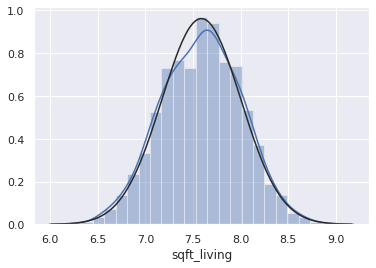

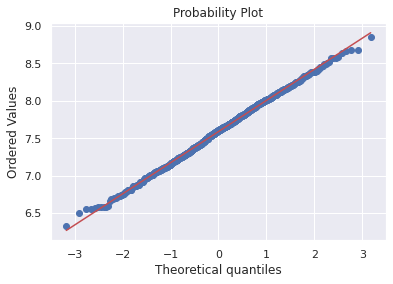

In [133]:
#transformed histogram and normal probability plot
sns.distplot(df_drop_test['sqft_living'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop_test['sqft_living'], plot=plt)

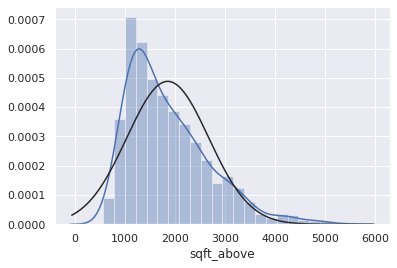

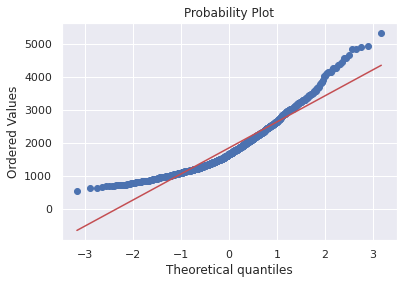

In [134]:
#histogram and normal probability plot
sns.distplot(df_drop_test['sqft_above'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop_test['sqft_above'], plot=plt)

In [135]:
#data transformation
df_drop_test['sqft_above'] = np.log(df_drop_test['sqft_above'])

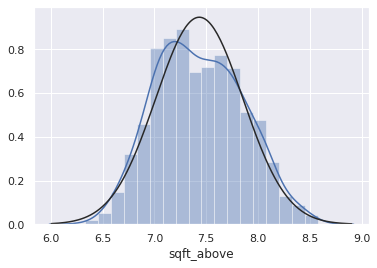

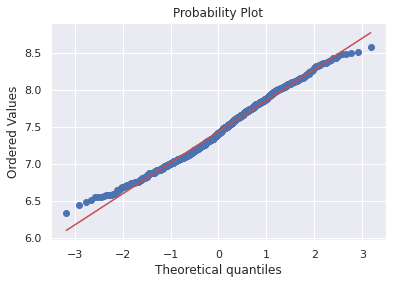

In [136]:
#transformed histogram and normal probability plot
sns.distplot(df_drop_test['sqft_above'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop_test['sqft_above'], plot=plt)

In [137]:
#create column for new variable 
#if area>0 it gets 1, for area==0 it gets 0
df_drop_test['hasabove'] = pd.Series(len(df_drop_test['sqft_above']), index=df_drop_test.index)
df_drop_test['hasabove'] = 0 
df_drop_test.loc[df_drop_test['sqft_above']>0,'hasabove'] = 1

In [138]:
#transform data
df_drop_test.loc[df_drop_test['hasabove']==1,'sqft_above'] = np.log(df_drop_test['sqft_above'])

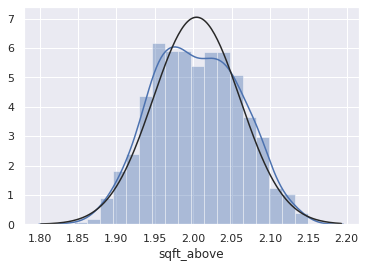

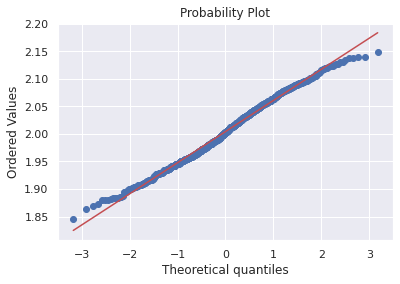

In [139]:
#histogram and normal probability plot
sns.distplot(df_drop_test[df_drop_test['sqft_above']>0]['sqft_above'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_drop_test[df_drop_test['sqft_above']>0]['sqft_above'], plot=plt)

NUMERICAL AND CATEGORICAL FEATURES

In [140]:


numerical_feats = df_drop.dtypes[df_drop.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_drop.dtypes[df_drop.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  14
Number of Categorical features:  2


In [141]:
print(df_drop[numerical_feats].columns)
print("*"*100)
print(df_drop[categorical_feats].columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'hasabove'],
      dtype='object')
****************************************************************************************************
Index(['city', 'statezip'], dtype='object')


Dopo aver trattato le variabili numeriche, scelgo di applicare il Label Encoder sulle due variabili categoriche

In [143]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [144]:
cols = ('city', 'statezip')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_drop[c].values)) 
    df_drop[c] = lbl.transform(list(df_drop[c].values))


verifico che le due variabili ora siano indicizzate come volevo

In [145]:
print(df_drop.statezip)

0       70
1        0
2       21
3        0
4       20
        ..
3675    74
3676    57
3677    27
3678    58
3679    49
Name: statezip, Length: 3636, dtype: int64


In [146]:
print(df_drop.city)

0       34
1        1
2       19
3        1
4       18
        ..
3675    34
3676    34
3677    26
3678    34
3679    34
Name: city, Length: 3636, dtype: int64


stessa cosa anche per le varibili categoriche del test set

In [147]:
cols_test = ('city', 'statezip')

for c in cols_test:
    lbl = LabelEncoder() 
    lbl.fit(list(df_drop_test[c].values)) 
    df_drop_test[c] = lbl.transform(list(df_drop_test[c].values))

In [148]:
print(df_drop_test.city)

0      33
1      15
2      30
3      33
4      30
       ..
915    33
916    31
917     1
918    39
919    25
Name: city, Length: 920, dtype: int64


PREPARAZIONE DELL'AMBIENTE DI VALIDATION ALL'INTERNO DEL TRAINING, splitto il training in due parti, 80% di training e il 20% di test 

In [149]:
y = df_drop['price']
del df_drop['price']

X = df_drop.values

y = y.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [150]:
df_drop

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,hasabove
0,3.0,2.75,7.824046,7378,1.0,0,0,5,1.979215,1110,1948,1985,34,70,1
1,3.0,2.00,7.615791,24829,1.0,0,0,4,1.961025,810,1979,0,1,0,1
2,3.0,2.50,7.867106,7256,2.0,0,0,3,2.062690,0,2014,0,19,21,1
3,4.0,2.00,7.770645,76665,2.0,0,0,4,2.050353,0,1978,2000,1,0,1
4,3.0,1.00,7.090077,7280,1.0,0,0,4,1.958696,0,1967,0,18,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,3.0,1.00,7.365180,6300,1.0,0,0,3,1.956323,400,1925,2002,34,74,1
3676,4.0,1.75,7.696213,7475,1.0,0,0,5,1.946348,1100,1955,0,34,57,1
3677,3.0,3.00,7.757906,5002,2.0,0,0,3,2.048712,0,2013,1923,26,27,1
3678,2.0,1.00,7.012115,3200,1.0,0,0,3,1.947639,0,1925,2002,34,58,1


LINEAR REGRESSION

provo un po' di modelli per vedere quale è il migliore

In [151]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [152]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [13.5973904]
Real value 13.76432252119484


In [154]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  54.768087259281174


In [155]:
def mape(y_test, X_test):
  return (np.abs((y_test - X_test)/(y_test+1))).mean()



In [156]:
mape(y_test, model.predict(X_test))

0.020229799831183164

RANDOM FOREST

In [157]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor(n_estimators=1000)

In [158]:
#Fit
model_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [159]:
#Score/Accuracy
print("Accuracy --> ", model_2.score(X_test, y_test)*100)

Accuracy -->  72.61581946205968


In [160]:
def mape(y_test, X_test):
  return (np.abs((y_test - X_test)/(y_test+1))).mean()


In [161]:
mape(y_test, model_2.predict(X_test))

0.013733472691456841

GRADIENT BOOSTING

In [162]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [163]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [164]:
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  72.97046229397463


In [165]:
def mape(y_test, X_test):
  return (np.abs((y_test - X_test)/(y_test+1))).mean()


In [166]:
mape(y_test, GBR.predict(X_test))

0.013519183344053049

XGBOOST

In [167]:
#Train the model
from xgboost import XGBRegressor
XGB = XGBRegressor()

In [168]:
#Fit
XGB.fit(X_train, y_train)

[20:33:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [169]:
print("Accuracy --> ", XGB.score(X_test, y_test)*100)

Accuracy -->  70.76590255040371


In [170]:
def mape(y_test, X_test):
  return (np.abs((y_test - X_test)/(y_test+1))).mean()

In [171]:
mape(y_test, XGB.predict(X_test))

0.014553494277708068

TEST SUL TEST SET SENZA TARGET
applic il modello migliore al secondo set di dati senza target 

In [172]:
final_pred = GBR.predict(df_drop_test)
final_pred

array([13.15556334, 13.66633421, 13.01315135, 12.87973609, 13.23219484,
       13.08856119, 12.64992823, 12.9642126 , 13.13359054, 13.14681307,
       13.04161662, 12.67630455, 12.66926804, 12.84745445, 13.14335959,
       13.16214224, 13.30669333, 12.53621501, 12.70969907, 13.37131907,
       13.79032587, 12.63375393, 13.43642774, 12.43723761, 13.88037603,
       13.42403932, 13.38891909, 13.02962124, 13.41689299, 13.0745386 ,
       12.39264601, 12.57510087, 13.30365935, 13.3291907 , 13.26620109,
       12.97422435, 13.1875438 , 12.686173  , 12.72558726, 13.26481916,
       12.641641  , 13.7376655 , 13.18062226, 12.8899579 , 12.55295349,
       13.2205337 , 13.17505523, 12.41727509, 12.75746665, 12.97427637,
       13.33623749, 12.90848847, 12.95315318, 12.52569685, 12.87403952,
       13.14497659, 14.10357952, 12.43891899, 13.25343382, 12.51669103,
       12.93383183, 13.09876375, 13.47104279, 12.86126095, 13.39383247,
       13.53756677, 12.56130474, 12.44568544, 12.98579991, 13.29

In [173]:
final_pred_exp = np.exp(final_pred) #ritrasformo in numero decimale perchè i valori sono ancora logaritmici

In [174]:
final_pred_exp

array([ 516878.61354621,  861417.19601366,  448270.15528996,
        392281.93861103,  558044.97548162,  483381.36394367,
        311741.07289451,  426860.52528197,  505645.21206592,
        512375.51939511,  461213.62837979,  320073.05505471,
        317828.76569915,  379820.65215707,  510609.09203274,
        520290.32115579,  601206.24557902,  278233.2338201 ,
        330942.2174251 ,  641342.60032118,  975129.80528574,
        306739.43799338,  684488.91942811,  252013.4188857 ,
       1067015.46724112,  676061.49397084,  652730.1615046 ,
        455714.24877741,  671247.35575046,  476650.40545014,
        241022.60561664,  289265.68504486,  599384.96510611,
        614885.10280758,  577348.35077115,  431155.61079784,
        533675.79174417,  323247.31822333,  336242.28433766,
        576551.04557566,  309168.27990162,  925107.75212707,
        529994.68759762,  396312.33271931,  282929.63063855,
        551575.33032045,  527052.38990198,  247032.47583876,
        347134.17400788,

creo il dataframe per associare l'indice della casa al valore di prezzo predetto

In [175]:
final = pd.DataFrame(final_pred_exp)
final.insert(0, "id", df_test.id, True)


In [176]:
final

,id,0
0,858,516878.613546
1,1874,861417.196014
2,918,448270.155290
3,475,392281.938611
4,2466,558044.975482
...,...,...
915,3204,474663.179027
916,130,681166.996642
917,2494,275463.108056
918,358,558387.248465


In [177]:
final.rename(columns={0:'price'}, inplace=True)

In [178]:
final

,id,price
0,858,516878.613546
1,1874,861417.196014
2,918,448270.155290
3,475,392281.938611
4,2466,558044.975482
...,...,...
915,3204,474663.179027
916,130,681166.996642
917,2494,275463.108056
918,358,558387.248465


In [179]:
final.to_csv('final.csv', index=False)